# **Randomly subsetting DataFrames using Pandas vs. using NumPy**

When working with a lot of data, it can be useful to create a subset of a much larger table. Common scenarios for this could be when you want to quickly prototype code but not run it on millions of rows, or maybe you're trying to get a handful of rows to implement mini-batch stochastic gradient descent.

## **Sampling without replacement**
Python's Pandas library includes the `sample()` function ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)) which is a straightforward way to return a random sample of rows or columns from a dataframe. You simply call it on the dataframe with the number of rows you'd like to select, and it returns a smaller dataframe without modifying the original one. Pandas is built on NumPy, so we expect it to be quite fast. That being said, you can always accomplish the same thing in different ways.

NumPy has the `random.choice()` function ([link](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)) that can also be used to sample without replacement. You can use this function to randomly select indices from a list of possible values, then pass this list of chosen indices to the Pandas `iloc[]` function.

## **Sampling with replacement**
To use Pandas to sample with replacement, use the `sample()` function again, but specify the keyword argument `replace=True`.

To sample with replacement using NumPy, we can use NumPy's `random.randint()` function ([link](https://numpy.org/devdocs/reference/random/generated/numpy.random.randint.html)) to again generate a series of possible indices, then pass these to Pandas' `iloc[]` function to get the selected rows. `random.randint()` takes 3 primary arguments: `low` specifies the lower bound for selected integers, `high` specifies the upper bound for selected integers, and `size` specifies how many integers you want returned. `random.randint()` is substantially faster than using `random.choice()` with `replace=True` because `random.choice()` first has to create a list of ALL possible values prior to selecting values from it. For a dataframe with 1,000,000 rows, that means that `random.choice()` spends time generating a list of 1,000,000 numbers before making any selections.

## **Test Methods**
1. Create DataFrames with lengths varying from 1,000 rows to 10,000,000 rows
2. For each DataFrame length, run the function to be tested 100 times and log its execution time on each pass
3. Get the mean execution time for each function for each size source dataframe
4. Compare the results

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
notebook_start_time = time.time()

# Make the plots higher resolution
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [3]:
# Set the seed for repeatable results
np.random.seed(123)

## **Defining the functions**

In [4]:
# Functions for subsetting WITHOUT replacement
def pd_sample_wo_replacement(df, n_rows):
    pd_random_subset = df.sample(n=n_rows, axis=0, replace=False)
    return pd_random_subset

def np_sample_wo_replacement(df, n_rows):
    np_random_subset = df.iloc[np.random.choice([i for i in range(df.shape[0])], replace=False, size=n_rows)]
    return np_random_subset

# Functions for subsetting WITH replacement
def pd_sample_w_replacement(df, n_rows):
    pd_random_subset = df.sample(n=n_rows, axis=0, replace=True)
    return pd_random_subset

def np_sample_w_replacement(df, n_rows):
    np_random_subset = df.iloc[np.random.randint(low=0, high=df.shape[0], size=n_rows)]
    return np_random_subset

## **Test Parameters**

In [5]:
# Possible number of rows in the original DataFrame: from 1,000 to 10,000,000
row_vals = [round(val) for val in np.logspace(start=3, stop=7, num=20)]

# How many times to test at each dataframe length
num_trials_per_size = 100

## **Sampling WITHOUT replacement - Pandas vs. NumPy**

In [6]:
# These store the MEAN run times for each dataframe length
pd_wo = []
np_wo = []

# Define number of rows in source DataFrame
for i in row_vals:
    
    # These store the run times for EACH individual test
    pd_runtime = []
    np_runtime = []
    
    # Collect the runtimes from trials
    for j in range(num_trials_per_size):
    
        # Create DataFrame with i rows
        arr = np.random.rand(i, 50)
        df = pd.DataFrame(arr)

        # Time the Pandas function to subset 100 rows
        pd_start_time = time.time()
        pd_sample_wo_replacement(df, 100)
        pd_end_time = time.time()

        # Time the NumPy function to subset 100 rows
        np_start_time = time.time()
        np_sample_wo_replacement(df, 100)
        np_end_time = time.time()
        
        # Log the times in the pd_runtime and np_runtime lists
        pd_runtime.append(pd_end_time - pd_start_time)
        np_runtime.append(np_end_time - np_start_time)
    
    # Get the mean run time for each dataframe length
    pd_wo.append(sum(pd_runtime) / len(pd_runtime))
    np_wo.append(sum(np_runtime) / len(np_runtime))

## **Sampling WITH replacement - Pandas vs. NumPy**

In [7]:
# These store the MEAN run times for each dataframe length
pd_w = []
np_w = []

# Define number of rows in source DataFrame
for i in row_vals:

    # These store the run times for EACH individual test
    pd_runtime = []
    np_runtime = []
    
    # Collect the runtimes from many trials
    for j in range(num_trials_per_size):
    
        # Create DataFrame with i rows
        arr = np.random.rand(i, 50)
        df = pd.DataFrame(arr)

        # Time the Pandas function to subset 100 rows
        pd_start_time = time.time()
        pd_sample_w_replacement(df, 100)
        pd_end_time = time.time()

        # Time the NumPy function to subset 100 rows
        np_start_time = time.time()
        np_sample_w_replacement(df, 100)
        np_end_time = time.time()
        
        # Log the times in the pd_runtime and np_runtime lists
        pd_runtime.append(pd_end_time - pd_start_time)
        np_runtime.append(np_end_time - np_start_time)
    
    # Get the mean run time for each dataframe length
    pd_w.append(sum(pd_runtime) / len(pd_runtime))
    np_w.append(sum(np_runtime) / len(np_runtime))

## **Results**

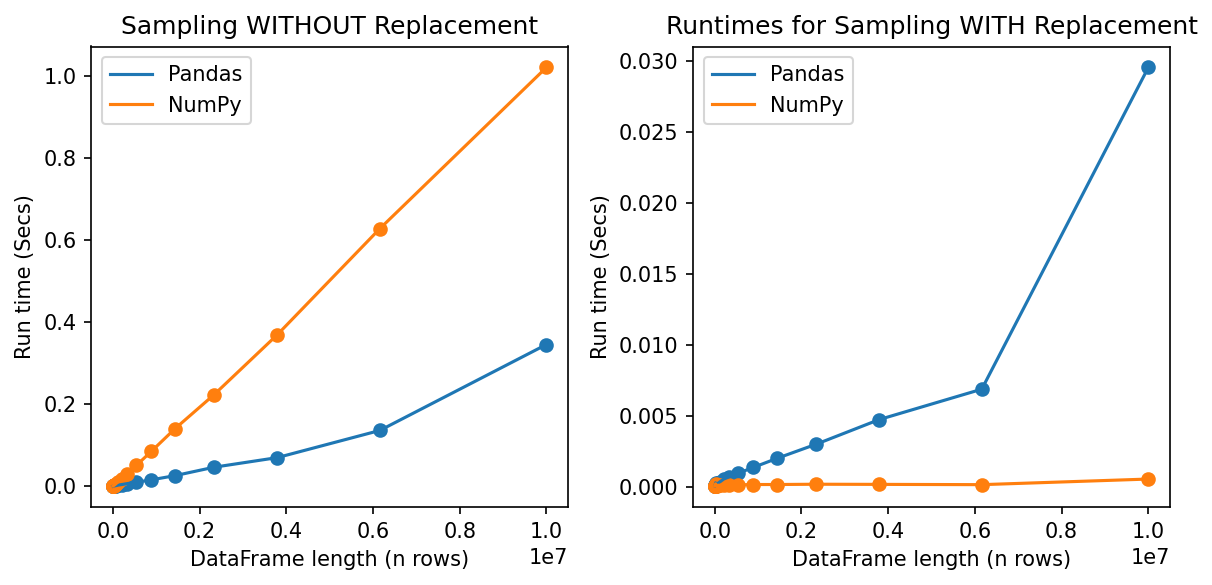

In [8]:
# Create plot of runtimes
xs = [i for i in row_vals]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(xs, pd_wo, label='Pandas')
ax[0].plot(xs, np_wo, label='NumPy')
ax[0].scatter(x=xs, y=pd_wo)
ax[0].scatter(x=xs, y=np_wo)
ax[0].title.set_text('Sampling WITHOUT Replacement')
ax[0].set_xlabel('DataFrame length (n rows)')
ax[0].set_ylabel('Run time (Secs)')
ax[0].legend()

ax[1].plot(xs, pd_w, label='Pandas')
ax[1].plot(xs, np_w, label='NumPy')
ax[1].scatter(x=xs, y=pd_w)
ax[1].scatter(x=xs, y=np_w)
ax[1].title.set_text('Runtimes for Sampling WITH Replacement')
ax[1].set_xlabel('DataFrame length (n rows)')
ax[1].set_ylabel('Run time (Secs)')
ax[1].legend()
fig.tight_layout()
plt.show()

We can see from the plots that the results are VERY different depending on whether you are sampling with or without replacement.

For sampling **WITHOUT** replacement, **Pandas' `sample()` is faster** than NumPy's `random.choice()` by a factor of more than 2, and both libraries' functions approximately follow O(n) time.

For sampling **WITH** replacement, **NumPy's `random.randint()` + Pandas' `iloc[]` is faster** than Pandas' `sample()` method by a HUGE margin. Using NumPy to generate indices appears to follow constant time whereas Pandas' `.sample()` method seems to follow O(n^2) time.

In [9]:
notebook_end_time = time.time()

In [10]:
print(f'Total notebook runtime: {(notebook_end_time - notebook_start_time):.2f} secs')

Total notebook runtime: 1733.52 secs
